In [1]:
import csv

# Open the input CSV file
with open('healthcare_dataset-synthetic_data_updated.csv', 'r') as input_file:
    # Create a CSV reader object
    reader = csv.reader(input_file)
    
    # Open the output CSV file
    with open('output.csv', 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over the first 50 rows and write them to the output file
        for i in range(50):
            row = next(reader)
            writer.writerow(row)

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('output.csv')

# Fill the last two columns for the first 50 rows
for i in range(1, 51):
    df.at[i-1, 'user_id'] = f'user{i}'
    df.at[i-1, 'password'] = f'password{i}'

# Save the updated DataFrame to a new CSV file
df.to_csv('output.csv', index=False)

C:\Users\pruth\AppData\Local\Temp\ipykernel_10876\1668186957.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'user1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[i-1, 'user_id'] = f'user{i}'
C:\Users\pruth\AppData\Local\Temp\ipykernel_10876\1668186957.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'password1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[i-1, 'password'] = f'password{i}'


In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Original names
names = [
    "Bobby JacksOn", "LesLie TErRy", "DaNnY sMitH", "andrEw waTtS", "adrIENNE bEll", 
    "EMILY JOHNSOn", "edwArD EDWaRDs", "CHrisTInA MARtinez", "JASmINe aGuIlaR", 
    "CHRISTopher BerG", "mIchElLe daniELs", "aaRon MARtiNeZ", "connOR HANsEn", 
    "rObeRt bAuer", "bROOkE brady", "MS. nAtalIE gAMble", "haley perkins", 
    "mRS. jamiE cAMPBELl", "LuKE BuRgEss", "dANIEL schmIdt", "tIMOTHY burNs", 
    "CHRISToPHEr BRiGhT", "KatHRYn StewArt", "dR. EilEEn thomPsoN", "PAUl hEndERsON", 
    "PeTER fiTzgeRaLd", "cathy sMaLl", "mr. KenNEth MoORE", "MaRy hUNter", 
    "jOSHUA OLiVer", "ThOMAS MartInEZ", "JAmES pattERson", "WilLIAM cOOPEr", 
    "Erin oRTEga", "NicOlE RodriGUEz", "DAvID AndErSON", "DEnIse ToRRES", 
    "CasSAndrA Robinson", "NIcOlE LUcErO", "PAmela fErNanDeZ", "chRiSTOPHer LEe", 
    "ThomAS morsE", "Mr. eRiC Lane", "KAThEriNE SmiTH", "pAUL wILLiAmS", 
    "lYNn MaRtinez", "chRIsTOpHEr CHaPmAN", "CHRis fRYe", "kyLE bEnneTT"
]

# Generate synthetic data for 30 days
days = 30
synthetic_data = []

for day in range(days):
    # Generate a date for each day
    date = (datetime.now() + timedelta(days=day)).strftime('%Y-%m-%d')
    for name in names:
        # Generate random valid values for health metrics
        bp_ul = np.random.randint(90, 210)
        bp_ll = np.random.randint(60, 120)
        sl_bf = np.random.randint(60, 200)
        sl_af = np.random.randint(60, 220)
        hr = np.random.randint(50, 120)

        # Append the new row to synthetic data
        synthetic_data.append([name, bp_ul, bp_ll, sl_bf, sl_af, hr, date])

# Create a new DataFrame for synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=["Name", "BP_UL", "BP_LL", "SL_BF", "SL_AF", "HR", "Date"])

# Save to CSV
synthetic_df.to_csv("patient_data_30_days.csv", index=False)
print("Synthetic data generated and saved to patient_data_30_days.csv")


Synthetic data generated and saved to patient_data_30_days.csv


C:\Users\pruth\AppData\Local\Temp\ipykernel_12968\1774133157.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_data['Date'] = pd.to_datetime(person_data['Date'])


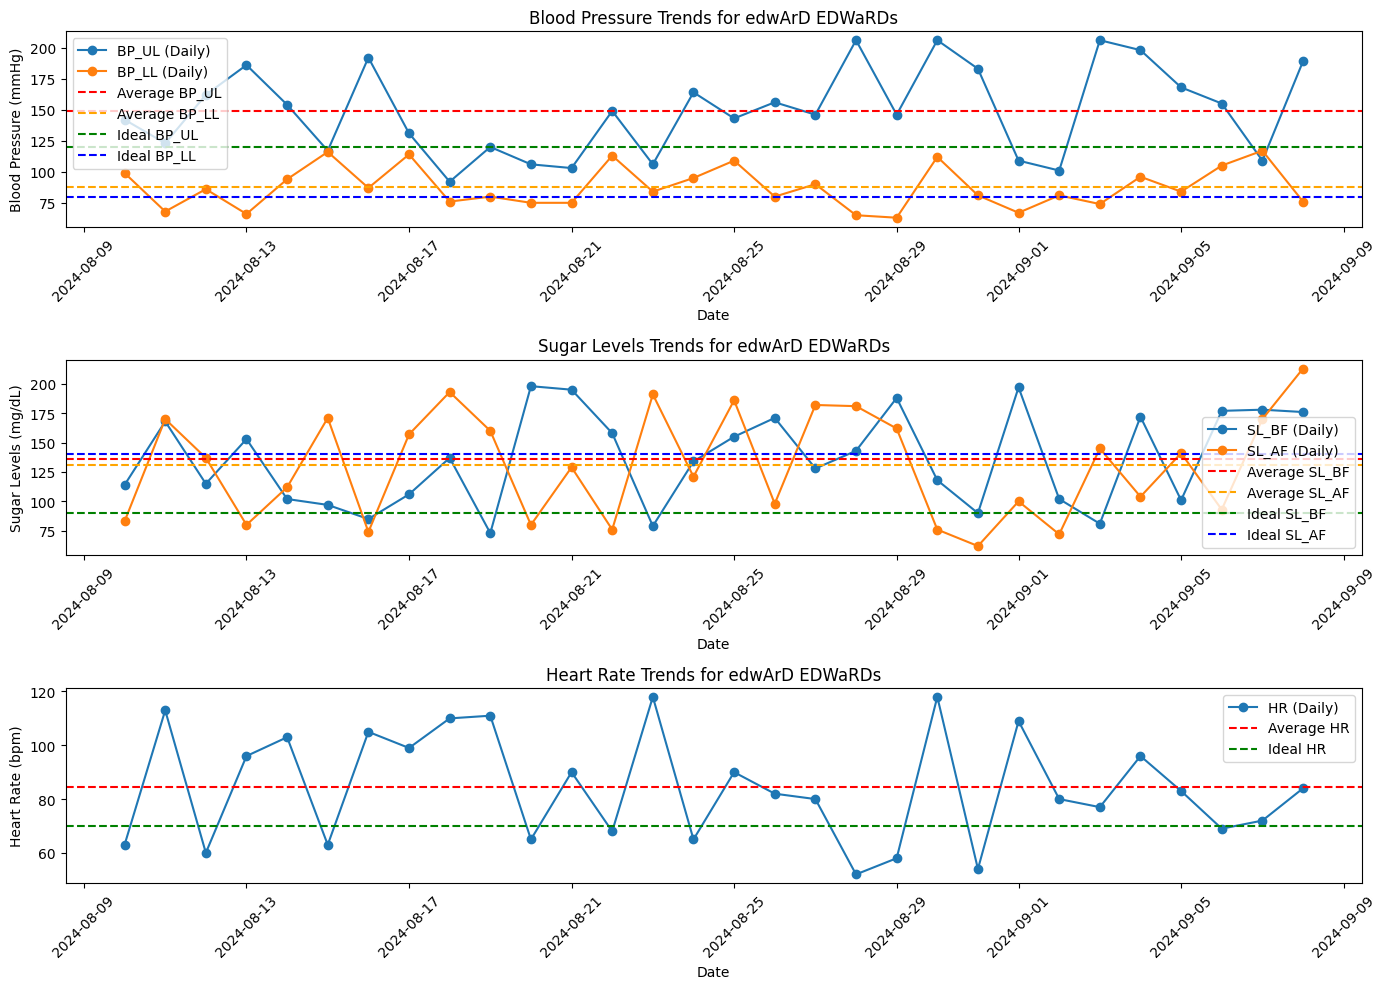

In [21]:
## For Separate Separate Graphs

# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the synthetic data
# df = pd.read_csv("patient_data_30_days.csv")

# # Function to visualize data for a specific person
# def visualize_person_data(name):
#     # Filter data for the specific person
#     person_data = df[df['Name'] == name]
    
#     # Convert the 'Date' column to datetime for easier handling
#     person_data['Date'] = pd.to_datetime(person_data['Date'])

#     # Set the Date as the index
#     person_data.set_index('Date', inplace=True)

#     # Calculate daily averages
#     averages = person_data[['BP_UL', 'BP_LL', 'SL_BF', 'SL_AF', 'HR']].mean()

#     # Define ideal values for visualization (example values)
#     ideal_values = {
#         'BP_UL': 120,
#         'BP_LL': 80,
#         'SL_BF': 90,
#         'SL_AF': 140,
#         'HR': 70
#     }

#     # Plotting
#     plt.figure(figsize=(14, 10))

#     # Plot each metric
#     for metric in ['BP_UL', 'BP_LL', 'SL_BF', 'SL_AF', 'HR']:
#         plt.subplot(3, 2, ['BP_UL', 'BP_LL', 'SL_BF', 'SL_AF', 'HR'].index(metric) + 1)
#         plt.plot(person_data.index, person_data[metric], label=f"{metric} (Daily)", marker='o')
#         plt.axhline(y=averages[metric], color='r', linestyle='--', label='Average')
#         plt.axhline(y=ideal_values[metric], color='g', linestyle='--', label='Ideal')
#         plt.title(f"{metric} Trends for {name}")
#         plt.xlabel("Date")
#         plt.ylabel(metric)
#         plt.legend()
#         plt.xticks(rotation=45)

#     plt.tight_layout()
#     plt.show()

# # Example usage
# visualize_person_data("edwArD EDWaRDs")


## For Merged Graphs
import pandas as pd
import matplotlib.pyplot as plt

# Load the synthetic data
df = pd.read_csv("patient_data_30_days.csv")

# Function to visualize data for a specific person
def visualize_person_data(name):
    # Filter data for the specific person
    person_data = df[df['Name'] == name]
    
    # Convert the 'Date' column to datetime for easier handling
    person_data['Date'] = pd.to_datetime(person_data['Date'])

    # Set the Date as the index
    person_data.set_index('Date', inplace=True)

    # Calculate daily averages
    averages = person_data[['BP_UL', 'BP_LL', 'SL_BF', 'SL_AF', 'HR']].mean()

    # Define ideal values for visualization (example values)
    ideal_values = {
        'BP_UL': 120,
        'BP_LL': 80,
        'SL_BF': 90,
        'SL_AF': 140,
        'HR': 70
    }

    # Plotting
    plt.figure(figsize=(14, 10))

    # Plot BP_UL and BP_LL in one graph
    plt.subplot(3, 1, 1)
    plt.plot(person_data.index, person_data['BP_UL'], label='BP_UL (Daily)', marker='o')
    plt.plot(person_data.index, person_data['BP_LL'], label='BP_LL (Daily)', marker='o')
    plt.axhline(y=averages['BP_UL'], color='r', linestyle='--', label='Average BP_UL')
    plt.axhline(y=averages['BP_LL'], color='orange', linestyle='--', label='Average BP_LL')
    plt.axhline(y=ideal_values['BP_UL'], color='g', linestyle='--', label='Ideal BP_UL')
    plt.axhline(y=ideal_values['BP_LL'], color='b', linestyle='--', label='Ideal BP_LL')
    plt.title(f"Blood Pressure Trends for {name}")
    plt.xlabel("Date")
    plt.ylabel("Blood Pressure (mmHg)")
    plt.legend()
    plt.xticks(rotation=45)

    # Plot SL_BF and SL_AF in one graph
    plt.subplot(3, 1, 2)
    plt.plot(person_data.index, person_data['SL_BF'], label='SL_BF (Daily)', marker='o')
    plt.plot(person_data.index, person_data['SL_AF'], label='SL_AF (Daily)', marker='o')
    plt.axhline(y=averages['SL_BF'], color='r', linestyle='--', label='Average SL_BF')
    plt.axhline(y=averages['SL_AF'], color='orange', linestyle='--', label='Average SL_AF')
    plt.axhline(y=ideal_values['SL_BF'], color='g', linestyle='--', label='Ideal SL_BF')
    plt.axhline(y=ideal_values['SL_AF'], color='b', linestyle='--', label='Ideal SL_AF')
    plt.title(f"Sugar Levels Trends for {name}")
    plt.xlabel("Date")
    plt.ylabel("Sugar Levels (mg/dL)")
    plt.legend()
    plt.xticks(rotation=45)

    # Plot HR in one graph
    plt.subplot(3, 1, 3)
    plt.plot(person_data.index, person_data['HR'], label='HR (Daily)', marker='o')
    plt.axhline(y=averages['HR'], color='r', linestyle='--', label='Average HR')
    plt.axhline(y=ideal_values['HR'], color='g', linestyle='--', label='Ideal HR')
    plt.title(f"Heart Rate Trends for {name}")
    plt.xlabel("Date")
    plt.ylabel("Heart Rate (bpm)")
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage
visualize_person_data("edwArD EDWaRDs")

